In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=af9ddc1b6af2c40da30c76eda440fe9f


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [9]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | cortez
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | huarmey
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | alyangula
Processing Record 10 of Set 1 | wad rawah
Processing Record 11 of Set 1 | khonuu
City not found. Skipping...
Processing Record 12 of Set 1 | quatre cocos
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | beloha
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | marzuq
Processing Record 20 of Set 1 | thinadhoo
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | ulaangom
Processing Record 23 of Set 1 | cilegon
Proces

Processing Record 38 of Set 4 | katsuura
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | dukat
Processing Record 42 of Set 4 | thunder bay
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 4 | nhulunbuy
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | key largo
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | mandalgovi
Processing Record 50 of Set 4 | ahipara
Processing Record 1 of Set 5 | onega
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | kozhva
Processing Record 5 of Set 5 | saquarema
Processing Record 6 of Set 5 | suez
Processing Record 7 of Set 5 | griffith
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5 | shahr-e kord
Processing Record 10 of Set 5 | marawi
Proc

Processing Record 26 of Set 8 | taoudenni
Processing Record 27 of Set 8 | emden
Processing Record 28 of Set 8 | amazar
Processing Record 29 of Set 8 | vestmanna
Processing Record 30 of Set 8 | dikson
Processing Record 31 of Set 8 | durango
Processing Record 32 of Set 8 | siavonga
Processing Record 33 of Set 8 | innisfail
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | cheremukhovo
Processing Record 36 of Set 8 | emba
Processing Record 37 of Set 8 | darhan
Processing Record 38 of Set 8 | bontang
Processing Record 39 of Set 8 | arawa
Processing Record 40 of Set 8 | san policarpo
Processing Record 41 of Set 8 | diffa
Processing Record 42 of Set 8 | primore
City not found. Skipping...
Processing Record 43 of Set 8 | matamoros
Processing Record 44 of Set 8 | umea
Processing Record 45 of Set 8 | bengkulu
Processing Record 46 of Set 8 | atbasar
Processing Record 47 of Set 8 | sibolga
Processing Record 48 of Set 8 | obigarm
Processing Record 49 of Set 8 | asau
Processing R

Processing Record 14 of Set 12 | bay city
Processing Record 15 of Set 12 | pauini
Processing Record 16 of Set 12 | gangawati
Processing Record 17 of Set 12 | ekhabi
Processing Record 18 of Set 12 | biltine
Processing Record 19 of Set 12 | forbes
Processing Record 20 of Set 12 | staroaleyskoye
Processing Record 21 of Set 12 | moron
Processing Record 22 of Set 12 | boueni
Processing Record 23 of Set 12 | orocue
Processing Record 24 of Set 12 | quang ngai
Processing Record 25 of Set 12 | sembe
Processing Record 26 of Set 12 | cascais
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | sainte-maxime
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | ternate
Processing Record 31 of Set 12 | victoria
Processing Record 32 of Set 12 | sorland
Processing Record 33 of Set 12 | camacha
Processing Record 34 of Set 12 | khasan
Processing Record 35 of Set 12 | ilabaya
Processing Record 36 of Set 12 | kailua
Processing Record 37 of Set 12 | shache
Proc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.0531,-135.3300,42.69,87,100,8.05,US,2022-03-30 23:04:40
1,Punta Arenas,-53.1500,-70.9167,48.31,71,75,19.57,CL,2022-03-30 23:04:41
2,Cortez,37.3489,-108.5859,53.04,40,40,21.54,US,2022-03-30 23:00:38
3,Hobart,-42.8794,147.3294,54.27,70,75,9.22,AU,2022-03-30 23:00:03
4,Ushuaia,-54.8000,-68.3000,41.18,85,96,6.51,AR,2022-03-30 23:01:16
5,Saskylakh,71.9167,114.0833,-4.50,98,100,7.11,RU,2022-03-30 23:04:41
6,Huarmey,-10.0681,-78.1522,72.23,80,43,10.87,PE,2022-03-30 23:04:42
7,Alyangula,-13.8483,136.4192,82.09,67,59,8.57,AU,2022-03-30 23:04:42
8,Wad Rawah,15.1603,33.1397,84.38,18,5,10.60,SD,2022-03-30 23:04:42
9,Quatre Cocos,-20.2078,57.7625,75.09,80,100,21.90,MU,2022-03-30 23:04:43


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-03-30 23:04:40,57.0531,-135.3300,42.69,87,100,8.05
1,Punta Arenas,CL,2022-03-30 23:04:41,-53.1500,-70.9167,48.31,71,75,19.57
2,Cortez,US,2022-03-30 23:00:38,37.3489,-108.5859,53.04,40,40,21.54
3,Hobart,AU,2022-03-30 23:00:03,-42.8794,147.3294,54.27,70,75,9.22
4,Ushuaia,AR,2022-03-30 23:01:16,-54.8000,-68.3000,41.18,85,96,6.51
5,Saskylakh,RU,2022-03-30 23:04:41,71.9167,114.0833,-4.50,98,100,7.11
6,Huarmey,PE,2022-03-30 23:04:42,-10.0681,-78.1522,72.23,80,43,10.87
7,Alyangula,AU,2022-03-30 23:04:42,-13.8483,136.4192,82.09,67,59,8.57
8,Wad Rawah,SD,2022-03-30 23:04:42,15.1603,33.1397,84.38,18,5,10.60
9,Quatre Cocos,MU,2022-03-30 23:04:43,-20.2078,57.7625,75.09,80,100,21.90


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

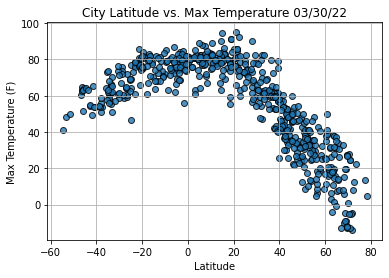

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

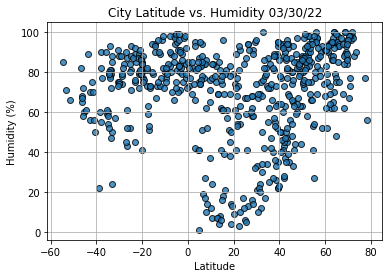

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

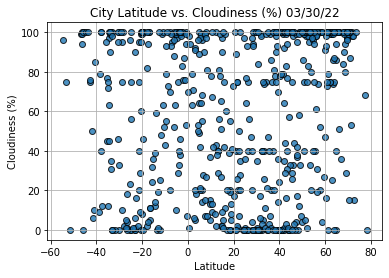

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

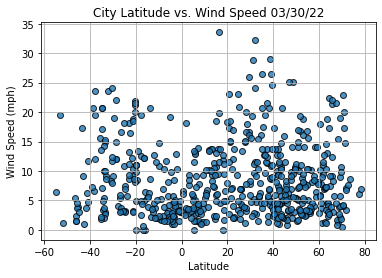

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13= city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-03-30 23:03:04
Lat                      -33.9258
Lng                       18.4232
Max Temp                    61.12
Humidity                       93
Cloudiness                    100
Wind Speed                   5.41
Name: 13, dtype: object

In [23]:
city_data_df["Lat"]>=0

0       True
1      False
2       True
3      False
4      False
       ...  
584    False
585     True
586     True
587     True
588     True
Name: Lat, Length: 589, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-03-30 23:04:40,57.0531,-135.3300,42.69,87,100,8.05
2,Cortez,US,2022-03-30 23:00:38,37.3489,-108.5859,53.04,40,40,21.54
5,Saskylakh,RU,2022-03-30 23:04:41,71.9167,114.0833,-4.50,98,100,7.11
8,Wad Rawah,SD,2022-03-30 23:04:42,15.1603,33.1397,84.38,18,5,10.60
10,Korla,CN,2022-03-30 23:04:43,41.7597,86.1469,42.10,60,0,10.07
...,...,...,...,...,...,...,...,...,...
583,Patiya,BD,2022-03-30 23:19:47,22.2931,91.9762,71.17,93,50,2.10
585,Arlit,NE,2022-03-30 23:19:47,18.7369,7.3853,75.76,4,13,4.83
586,Ihlow,DE,2022-03-30 23:19:48,51.8833,13.3333,36.43,93,75,3.44
587,Ewa Beach,US,2022-03-30 23:19:13,21.3156,-158.0072,85.95,53,75,15.01


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


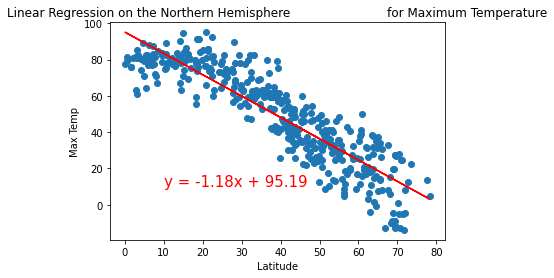

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

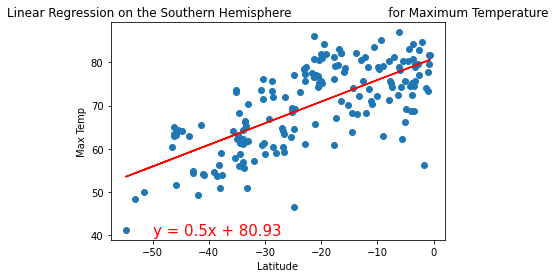

In [47]:


# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,40))

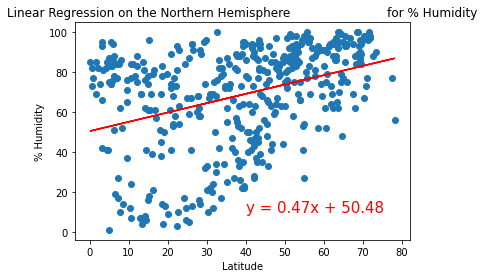

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

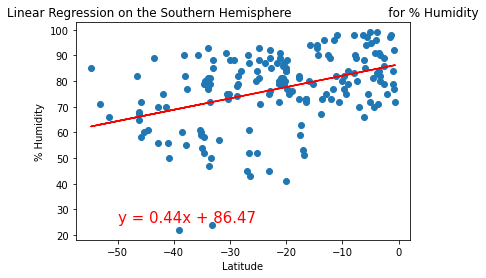

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

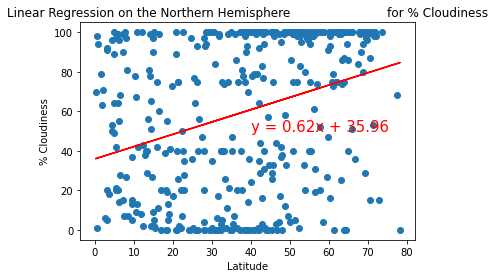

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

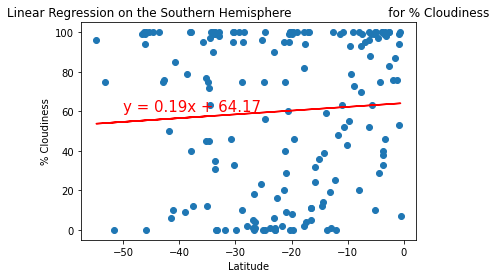

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

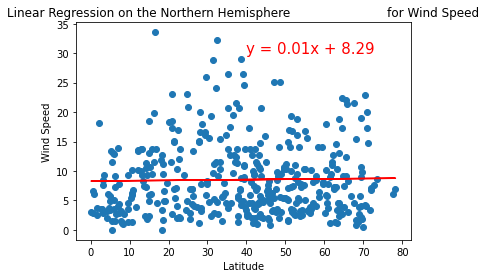

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))